<a href="https://colab.research.google.com/github/PaavaniKohli/PRODIGY_ML_04/blob/main/Hand_Gesture_Paavani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

np.random.seed(42)
tf.random.set_seed(42)

IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 10

def load_and_preprocess_data(data_dir):
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    train_generator = datagen.flow_from_directory(
        data_dir,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training'
    )

    validation_generator = datagen.flow_from_directory(
        data_dir,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation'
    )

    return train_generator, validation_generator

def create_model(num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

data_dir = 'C:\\Users\\Admin\\Downloads\\taskfour\\train_03'
train_generator, validation_generator = load_and_preprocess_data(data_dir)

num_classes = len(train_generator.class_indices)

model = create_model(num_classes)

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

model.save('hand_gesture_model.h5')

Found 1600 images belonging to 10 classes.
Found 400 images belonging to 10 classes.


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.6562 - loss: 1.1533 - val_accuracy: 0.9325 - val_loss: 0.4883
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 36s 713ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.9525 - val_loss: 0.2155
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 729ms/step - accuracy: 1.0000 - loss: 1.3751e-04 - val_accuracy: 0.9675 - val_loss: 0.1317
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 728ms/step - accuracy: 1.0000 - loss: 1.3065e-05 - val_accuracy: 0.9675 - val_loss: 0.1263
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 719ms/step - accuracy: 1.0000 - loss: 7.4028e-06 - val_accuracy: 0.9700 - val_loss: 0.1202
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 722ms/step - accuracy: 1.0000 - loss: 6.5763e-06 - val_accuracy: 0.9725 - val_loss: 0.1168
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 724ms/step - accuracy: 1.0000 - loss: 6.4219e-06 - val_accuracy: 0.9725 - val_loss: 0.1141
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 722ms/step - accuracy: 1.0000 - loss: 5.7774e-06 

In [4]:
!pip install scikit-image

   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ------ --------------------------------- 2.1/12.9 MB 11.8 MB/s eta 0:00:01
   ------------- -------------------------- 4.2/12.9 MB 12.0 MB/s eta 0:00:01
   ----------------- ---------------------- 5.5/12.9 MB 8.8 MB/s eta 0:00:01
   ------------------------- -------------- 8.1/12.9 MB 9.7 MB/s eta 0:00:01
   --------------------------------- ------ 10.7/12.9 MB 10.2 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 10.0 MB/s eta 0:00:00


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


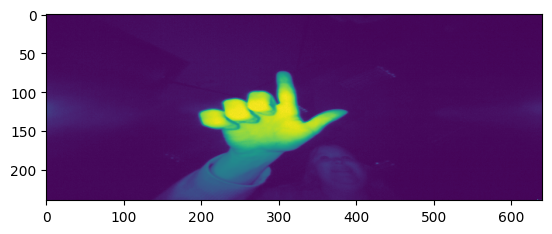

The predicted hand gesture is: 02_l


In [10]:
import numpy as np
from tensorflow.keras.preprocessing import image
from skimage.io import imread
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('hand_gesture_model.h5')

def predict_hand_gesture(image_path):
    img = image.load_img(image_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    class_labels = list(train_generator.class_indices.keys())
    predicted_gesture = class_labels[predicted_class]

    return predicted_gesture

image_path_to_predict = 'C:\\Users\\Admin\\Downloads\\taskfour\\test_03\\frame_02_02_0008.png'
predicted_gesture = predict_hand_gesture(image_path_to_predict)

img=imread(image_path_to_predict)
plt.imshow(img)
plt.show()

print(f"The predicted hand gesture is: {predicted_gesture}")